### Задание:

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В качестве датасета выбрана таблица приложений Google play:



In [43]:
data = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\3 Python и математика для анализа данных\\3.10 Визуализация данных\\googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


На первой диаграмме рассмотрим соотношение платных и бесплатных прижение в Google play:
для построения используем переменную Type типа String. Поскольку мы оцениваем соотношение и имеем всего 2 типа приложений, то подойдет круговая диаграмма. По ней заметно, что платных приложений менее 1/10.

Text(0, 0.5, 'Type')

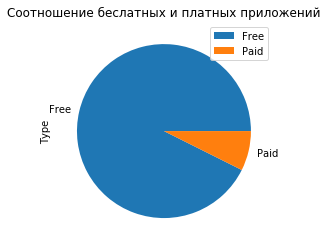

In [48]:
# в датасете есть 1 приложение с типом 0 и рейтингом 19 - явно ошибочное, поэтому первой строчкой выкидываю его
appdata = data[data['Type']!='0']
app_type = appdata.groupby('Type').count()
app_type.plot(kind='pie', y='Size')
plt.title('Соотношение беслатных и платных приложений')
plt.ylabel('Type')

На второй диаграмме проверим гипотезу, что платные приложения лучше бесплатных. Для этого сравним их средний рейтинг. Будем использовать переменную Type типа String и переменную Rating типа Float. Для сравнение количественных показателей подойдет столбчатая диаграмма.
Как показывает график, платные приложения имеют рейтинг чуть выше, но однозначный вывод сделать нельзя.

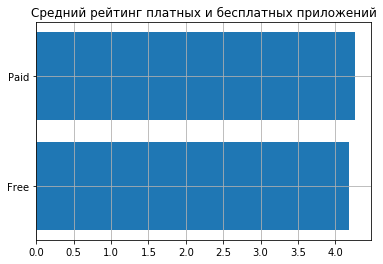

In [49]:
type_rating = appdata.groupby('Type').mean().reset_index()
plt.barh(type_rating['Type'], type_rating['Rating'])
plt.title('Средний рейтинг платных и бесплатных приложений')
plt.grid()

На третьем графике рассмотрим рейтинги приложений в зависимости от их категорий. Для этой задачи используем переменные Rating типа Float и Category типа String. Подробно расмотреть такой показатель можно с помощью графика "ящик с усами" (используем библиотеку plotly т.к. данных много и на статическом графике считать их будет сложнее). Но поскольку категорий более 30, то ограничемся 10-ю самыми популярными.
По данному графику можно сделать вывод, что во всех категориях есть очень хорошие приложения (везде максимум = 5), но самые качественные приложение делаются в категории Personalization (у этой категории максимальные значения медианы и вернего и нижнего квартилей), однако, также во всех категория много выбросов, что подразумевает, что плохие приложения также есть во всех категориях.

In [6]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [50]:
category_rating = appdata.groupby('Category').count().sort_values('App', ascending=False).reset_index().head(10)
category_list = category_rating['Category'].tolist()
category_rating_f = appdata[appdata['Category'].isin(category_list)]

In [8]:
data = []

for cat in category_rating_f.Category.unique():
     data.append(
        go.Box(y=category_rating_f[category_rating_f.Category==cat].Rating, 
               name=cat)
    )
iplot(data, show_link = False)

В качестве четверго графика рассмотрим зависимость рейтинга, количества скачиваний и количества отзывов. Рейтинг и количество отзывов - числовые величины, а вот количество скачиваний хоть и числовая величина, но этот столбцец надо сначала обработать, так как в нем содержится символ "+".
У приложений с высоким рейтингом больше отзывов, что вполне логично, ведь средний рейтинг у нас составляет 4.1, а значит, что большинство приложений имеет высокий рейтинг. Также можно отметить, что у приложений с высоким рейтингом всегда много скачиваний.

In [9]:
import seaborn as sns

In [23]:
appdata['Reviews'] = appdata.Reviews.astype('int64')

In [39]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null int32
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
new_inst          0 non-null object
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 1.5+ MB


In [36]:
appdata['Installs'] = appdata.Installs.str.replace('+', '').str.replace(',', '').astype(int, errors='ignore')

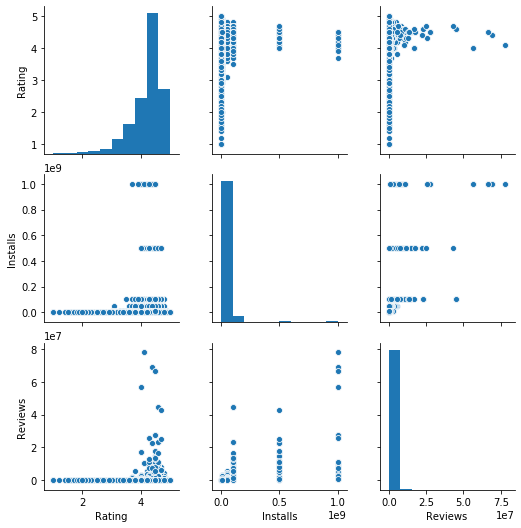

In [40]:
pair_plot = sns.pairplot(
    appdata[['Rating', 'Installs', 'Reviews']])
pair_plot

На тепловой карте рассмотрим средний рейтинг в зависимоти от категории приложения и возрастного ограничения. Данный пример, на самом деле, больше надуман и я использую его больше в учебных целях, чтобы попробовать построить данный тип графика. В данном примере я также использую 10 самых популярных жанров для лучшей читаемости. В качестве вывода можно отметить, что приложений с рейтингом 18+ и без ограничения (unrated) очень мало, а для остальных категорий выявить какую-либо закономерность сложно.

In [17]:
category_content_rating = category_rating_f.pivot_table(
                                index = 'Category',
                                columns = 'Content Rating',
                                values = 'Rating',
                                aggfunc = np.mean).fillna(0).applymap(float)
category_content_rating

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
BUSINESS,0.0,4.119064,0.000000,0.000000,4.300000,0.0
COMMUNICATION,0.0,4.140678,0.000000,4.311111,4.320833,0.0
FAMILY,0.0,4.194157,4.238889,4.193182,4.157438,0.0
GAME,0.0,4.283480,4.346923,4.262162,4.272531,0.0
LIFESTYLE,0.0,4.073759,3.840000,4.255556,4.416667,0.0
MEDICAL,0.0,4.176276,4.387500,4.466667,4.533333,0.0
PERSONALIZATION,0.0,4.323443,4.380000,4.500000,4.403571,0.0
PRODUCTIVITY,0.0,4.212968,3.600000,4.600000,4.050000,0.0
SPORTS,4.5,4.217091,4.333333,4.285714,4.140000,0.0


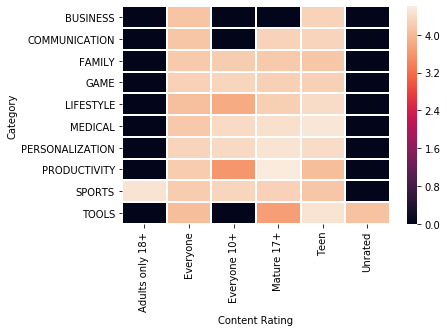

In [18]:
sns.heatmap(category_content_rating, linewidths = 1)